        ra        
------------------
290.93232480562904
  290.932371860991
  290.932455642757
 290.9324648242179
 290.9322524991548
 290.9325841838294
290.93261402393324
 290.9312758073839
290.93236152972986
  290.932482038112
290.93242924391205
290.93257729667545
 290.9326071368878
290.93262664706225
 290.9307880264093
 290.9334059376306
 290.9337181129891
290.93342544862844
 290.9333026445049
 290.9332532933906
290.93272305374404
 290.9327494509447
   290.93280913159
290.93346791481406
290.93315114793177
290.93274371223754
 290.9328894709215
 290.9349691148034
 290.9329147204491
 290.9329445608162
  290.932954890178
290.93295718559244
 290.9329330837313
 290.9328378239677
 290.9320355716581
  290.933455293244
 290.9333003522858
290.93388913020686
290.93364811016716
 290.9331924675019
 290.9331637746304
290.93242464482876
 290.9330719573353
290.93330379635927
  290.931436458849
290.93153171929515
 290.9328217547551
290.93118740318033
290.93278273231635
290.93278847089607
290.93307540

Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
/home/t.yoo/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Number of sources removed:  13
[112, 113, 116, 117, 118, 119, 122, 124, 125, 127, 128, 129, 130]


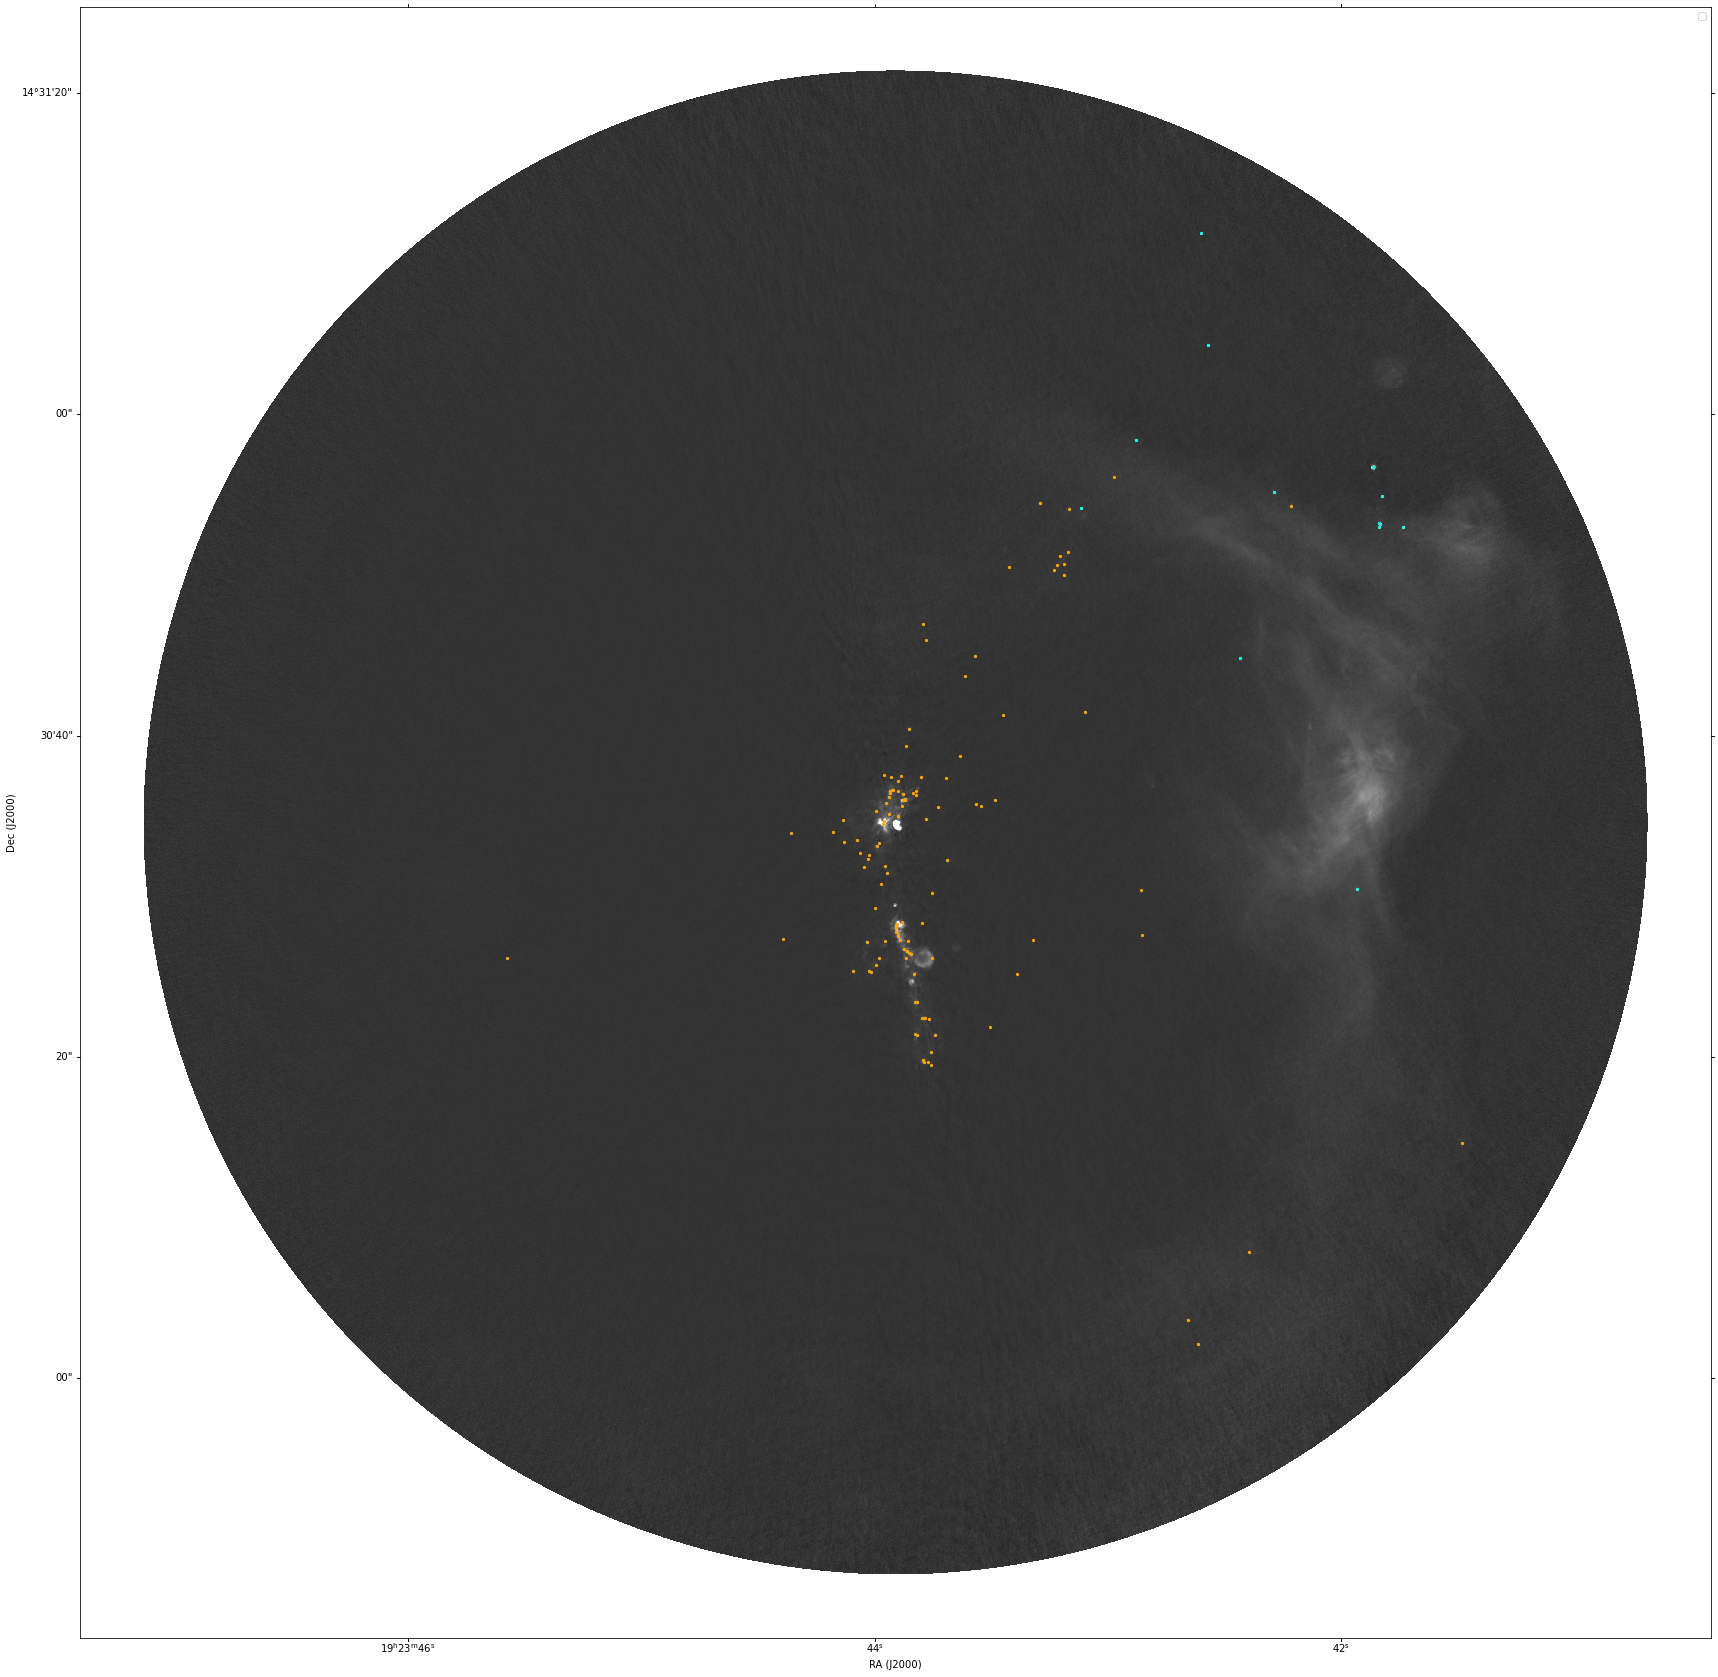

In [1]:
from astropy.table import Table, vstack
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.wcs import WCS
import astropy.units as u
from astropy.coordinates import SkyCoord
import numpy as np
import Paths.Paths as paths
from astropy.table import vstack, Table
Path = paths.filepaths()
def remove_duplicates(w51ecatfile, w51ncatfile, w51efitsfile, w51esavedir='tables/dendro_w51e_matched_duplicated_removed.fits', threshold=1e-6):
    
    # will remove duplicates from W51E

    w51e_cat = Table.read(w51ecatfile)
    w51n_cat = Table.read(w51ncatfile)


    w51e_ra = w51e_cat['ra']
    w51e_dec = w51e_cat['dec']
    w51n_ra = w51n_cat['ra']
    w51n_dec = w51n_cat['dec']
    w51e_ra.pprint(1000)
    w51e_dec.pprint(1000)
    w51n_ra.pprint(1000)
    w51n_dec.pprint(1000)
    removeind = []
    for i in range(len(w51e_ra)):
        dist = np.sqrt((w51e_ra[i] - np.array(w51n_ra))**2 + (w51e_dec[i] - np.array(w51n_dec))**2)
        if np.min(dist) < threshold:
            removeind.append(i)
            


    fig = plt.figure(figsize=(30, 30))
    wcs_w51e = WCS(fits.getheader(w51efitsfile),naxis=2)
    ax = fig.add_subplot(projection=wcs_w51e)
    w51efits = fits.open(w51efitsfile)
    w51e_image = w51efits[0].data[0, 0, :, :]
    w51efits.close()
    ax.imshow(w51e_image, origin='lower', cmap='gray', vmin=-0.000311680, vmax=0.001241484998551493)
    w51e_xy = wcs_w51e.all_world2pix(w51e_ra, w51e_dec, 0)
    ax.scatter(w51e_xy[0],w51e_xy[1], s=5, color='orange', marker='o')
    ax.scatter(w51e_xy[0][removeind], w51e_xy[1][removeind], s=5, color='cyan', marker='x')
    ax.set_xlabel('RA (J2000)')
    ax.set_ylabel('Dec (J2000)')
    ax.legend()     
    plt.savefig('pngs/check_duplicatd_sources.png', bbox_inches='tight', dpi=300)
    print('Number of sources removed: ', len(removeind))
    print(removeind)
    w51e_cat.remove_rows(removeind)
    w51e_cat.write(w51esavedir, overwrite=True)


remove_duplicates('tables/dendro_w51e_matched.fits', 'tables/dendro_w51n_matched.fits', Path.w51e_b3_tt0,threshold=1.2e-5) #roughly 0.04 arcsec